# House Price Prediction

## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

The company wants to know:

- 	Which variables are significant in predicting the price of a house
-   How well those variables describe the price of a house.


# Business Goal
- The company is looking at prospective properties to buy to enter the market.
- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide     whether to invest in them or not.
- Determine the optimal value of lambda for ridge and lasso regression.
- Model the price of houses with the available independent variables.
- This model will then be used by the management to understand how exactly the prices vary with the variables. They can           accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
- The model will be a good way for management to understand the pricing dynamics of a new market.

### Step 1: Reading and Understanding the Data

#### Import required packages and read the Housing dataset

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [262]:
# read the dataset
housing = pd.read_csv(r'C:\Dell WinLogs\train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [263]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [264]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [265]:
housing.shape

(1460, 81)

In [266]:
housing.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

# Step 2: Data Cleaning

#### Checking Missing  values and Imputation

In [267]:
# Checking missing values percentage

missing_values = round(housing.isna().sum() * 100/housing.shape[0], 2)
missing_values[missing_values > 0].sort_values(ascending= False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

- Columns PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage have very high percentage of missing value.


In [268]:
# Getting missing value Coulmns

missing_val_cols= missing_values[missing_values > 0].sort_values(ascending= False).index
missing_val_cols

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [269]:
# Checking unique values in these columns
for col in missing_val_cols:
  print('\nColumn Name:',col)
  print(housing[col].value_counts(dropna= False))


Column Name: PoolQC
NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

Column Name: MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

Column Name: Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

Column Name: Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

Column Name: FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

Column Name: LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
111.0      1
141.0      1
112.0      1
152.0      1
144.0      1
Name: LotFrontage, Length: 111, dtype: int64

Column Name: GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Column Name: GarageYrBlt
NaN       81
2005.0    65
2006.0    59
2004.0    53
200

- Below columns have high number of NA values


 - ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'MasVnrType', 'Electrical')
 
 
- so, replacing NaN values for above attributes with 'Not Present'.

In [270]:
# Replacing NaN with 'Not Present' for below columns
nul_cols= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
housing[nul_cols]= housing[nul_cols].fillna('Not Present')

In [271]:
# Checking percentage of missing values again
missing_values= round(housing.isna().sum() * 100/housing.shape[0], 2)
missing_values[missing_values > 0].sort_values(ascending= False)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [272]:
# Checking if there is any relation between column (GarageYrBlt and GarageType)
housing[housing.GarageYrBlt.isna()]['GarageType'].value_counts(normalize= True)

Not Present    1.0
Name: GarageType, dtype: float64

- After imputing NaN values of GarageType with 'Not Present', we can see that GarageYrBlt value is NaN for only those observations where GarageType is 'Not Present'. We can conclude that if garage is not available then there will be no 'GarageYrBlt' value for that. So, we can impute GarageYrBlt NaN values with 0.

In [273]:
# Imputing missing values of GarageYrBlt column
housing['GarageYrBlt']= housing['GarageYrBlt'].fillna(0)

In [274]:
# MSSubClass: "identifies the type of dwelling involved in the sale", is a categorical variable, but it's appearing as a numeric variable.
# Changing data type of MSSubClass
housing['MSSubClass']= housing['MSSubClass'].astype('object')

- Visualizing numeric variables:

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

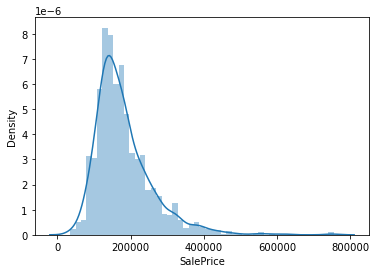

In [275]:
# Checking distribution of SalePrice
sns.distplot(housing['SalePrice'])

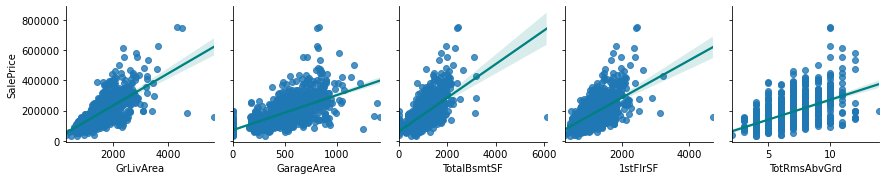

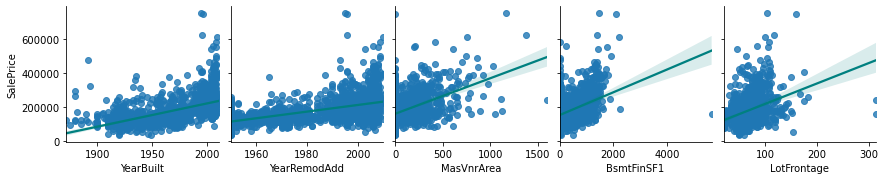

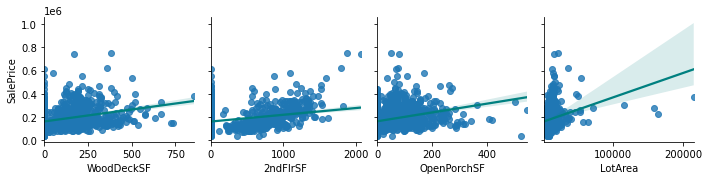

In [276]:
# Plotting numeric variables against SalePrice

numeric_cols= ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']

sns.pairplot(housing, x_vars=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housing, x_vars=['YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','LotFrontage'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housing, x_vars=['WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})

- SalePrice is right skewed and other numeic feature: 'GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea', 'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea' have outlier and they all have somewhat linear relation with SalePrice.

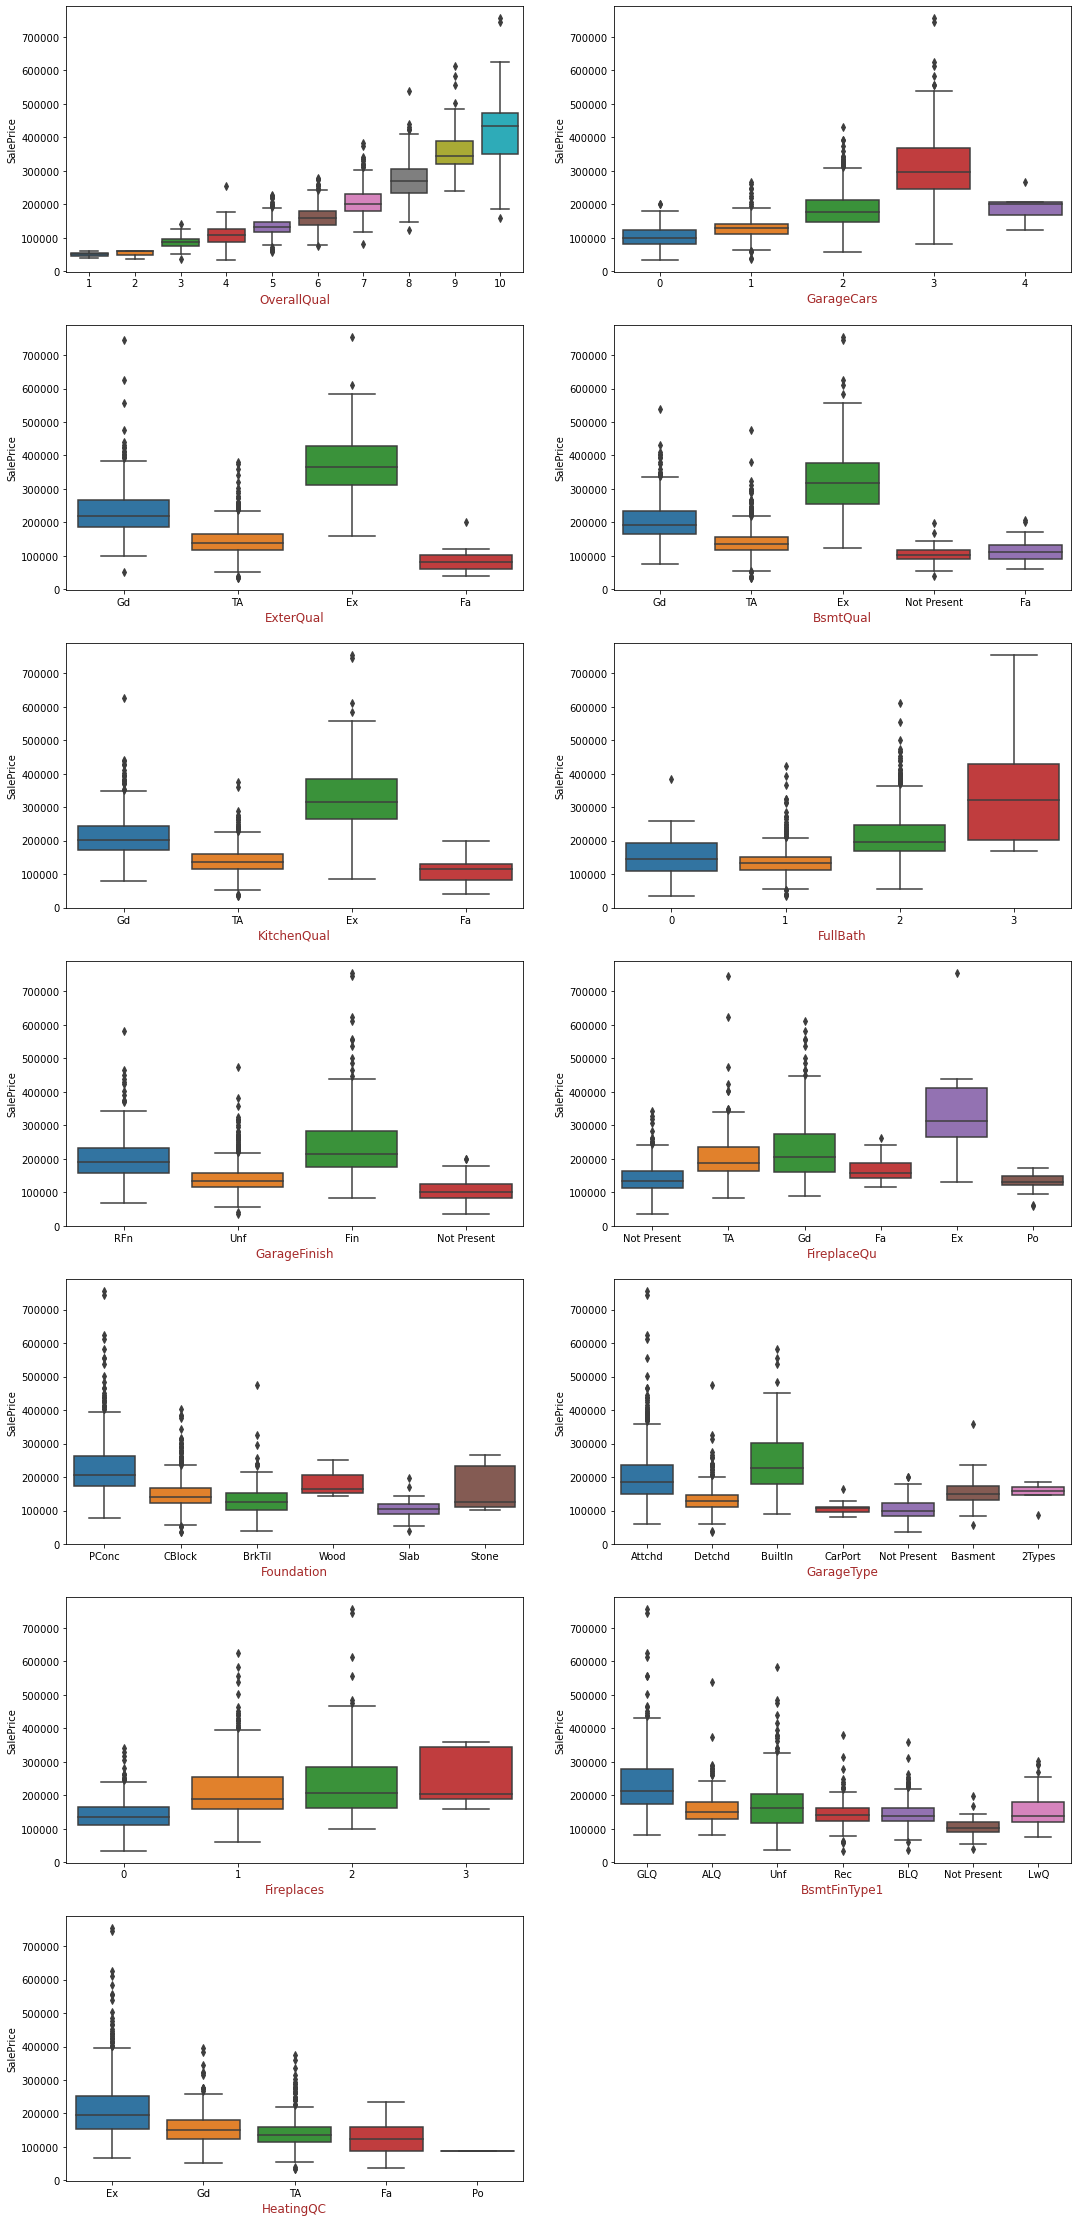

In [277]:
# Visualizing categorical variables:

categ_cols= ['OverallQual','GarageCars','ExterQual','BsmtQual','KitchenQual','FullBath','GarageFinish','FireplaceQu','Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']

plt.figure(figsize=[18, 40])

for i, col in enumerate(categ_cols, 1):
    plt.subplot(7,2,i)
    x_label= f'{col}'
    fig= sns.boxplot(data= housing, x= col, y= 'SalePrice')
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})
plt.show()

- Median SalePrice is higher for the houses with higher OverallQual rating. Houses with Excellent quality of the material on the exterior have highest price. Price reduces as quality decreases.

- Median SalePrice is higher for the houses having Excellent Heating quality and median price reduces with Heating quality type and least for the houses having Poor heating quality.

- Houses with garage car capacity of 3 have highest median SalePrice.

- SalePrice is high for houses with 3 Full bathrooms

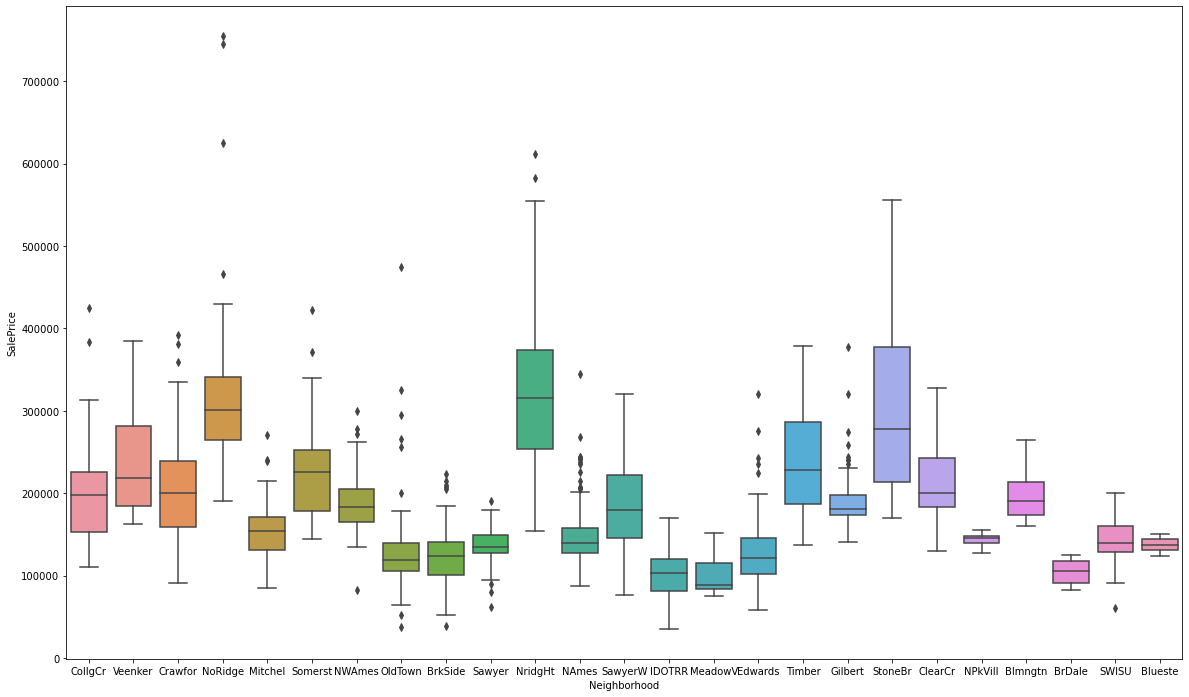

In [278]:
plt.figure(figsize=[20,12])
sns.boxplot(data= housing, x= 'Neighborhood', y= 'SalePrice')
plt.show()

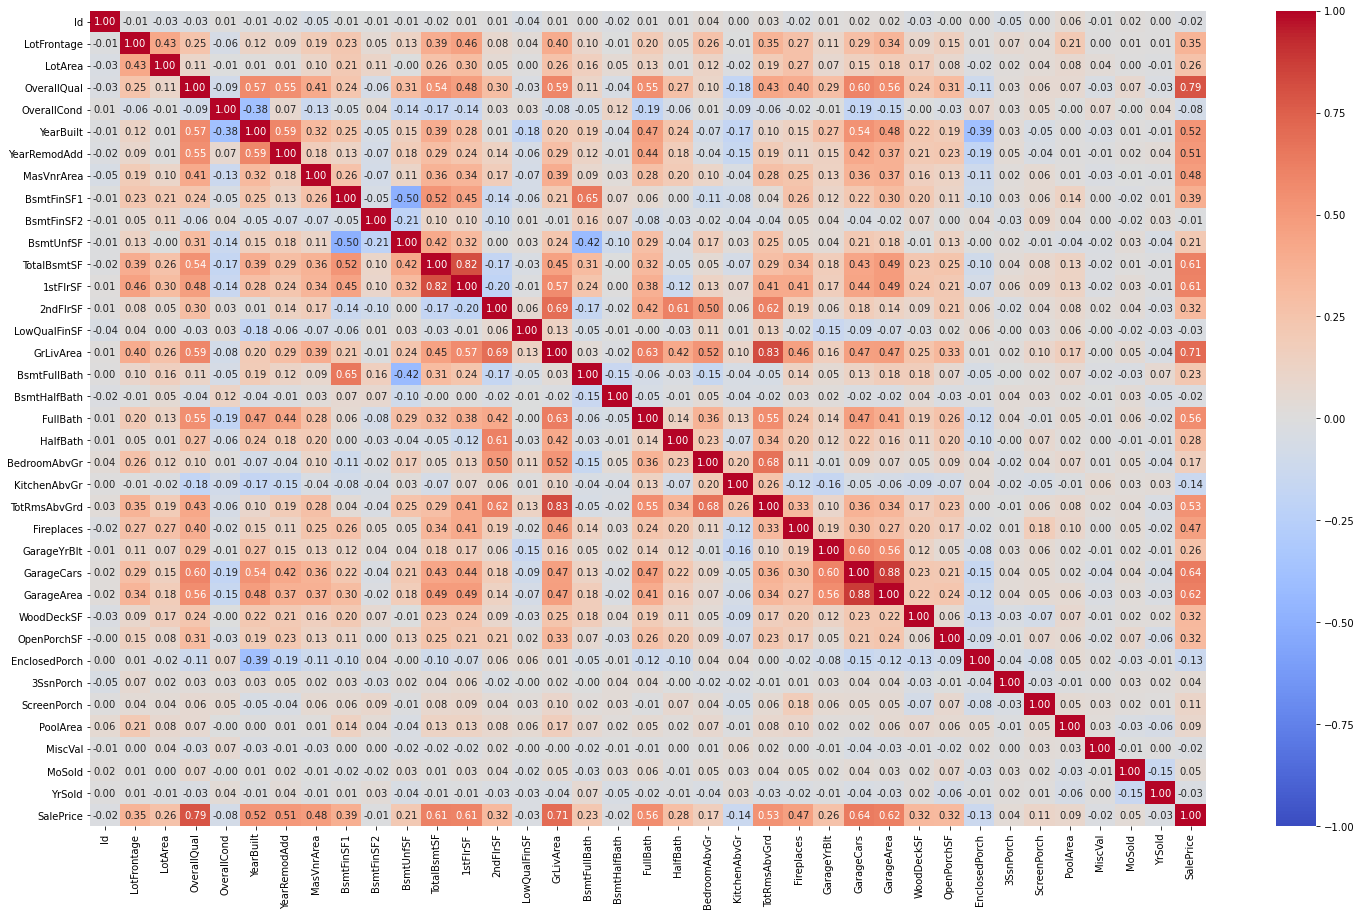

In [279]:
# Creating correlation heatmap
plt.figure(figsize = (25, 15))
sns.heatmap(housing.corr(), annot= True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

Below features are highly correlated 

- GarageCars and GarageArea= 0.88

- GrLivArea and TotRmsAbvGrd= 0.83

In [280]:
# Dropping GarageCars and TotRmsAbvGrd
housing.drop(['GarageCars','TotRmsAbvGrd'], axis= 1, inplace= True)
housing.shape

(1460, 79)

### Data Preparation
Earlier we have already seen that our target variable SalePrice is heavily right skewed. We can perform log transformation to remove the skewness.

- Transforming the target variable

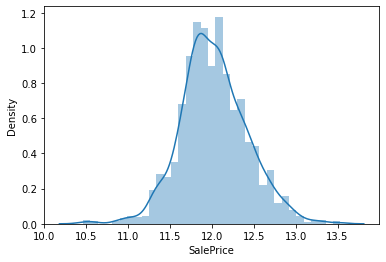

In [281]:
# Distplot of log transformed SalePrice
sns.distplot(np.log(housing['SalePrice']))
plt.show()

- After log transformation SalePrice has now near normal distribution.

In [282]:
# Transforming 'SalePrice'
housing['SalePrice_log_trans']= np.log(housing['SalePrice'])


- Now, Dropping SalePrice as we have ceate log transformed of it. Also dropping Id column, as it'll not help in predicction.


In [283]:
# Dropping ID Column and SalePrice
housing.drop(['SalePrice','Id'], axis=1, inplace= True)
housing.shape

(1460, 78)

### Train and Test Split

In [284]:
# Train-Test Split
y= housing['SalePrice_log_trans']
X= housing.drop('SalePrice_log_trans', axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

In [285]:
# Getting index values of train test dataset
train_index= X_train.index
test_index= X_test.index

- Imputing rest of the features in test and train dataset using median (for continuous variables) and mode (for categorical variables) calculated on train dataset.



In [286]:
# Performing Imputation for missing values in LotFrontage, MasVnrArea, MasVnrType, Electrical columns

housing['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)
housing['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)

housing['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)
housing['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)

housing['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)
housing['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)

housing['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)
housing['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)

- Encoding Categorical features

In [287]:
# Getting object and numeric type columns
housing_categ= housing.select_dtypes(include= 'object')
housing_num= housing.select_dtypes(exclude= 'object')

In [288]:
# 'Street','Utilities', 'CentralAir' have 2 unique data, so, encoding with 0 and 1
housing['Street']= housing.Street.map(lambda x: 1 if x== 'Pave' else 0)
housing['Utilities']= housing.Utilities.map(lambda x: 1 if x== 'AllPub' else 0)
housing['CentralAir']= housing.CentralAir.map(lambda x: 1 if x== 'Y' else 0)

For rest of the categorical columns used One Hot Encoding.

In [289]:
# Performing get_dummies
categ_cols= housing_categ.columns.tolist()
done_encoding= ['Street','Utilities', 'CentralAir']
categ_cols= [col for col in categ_cols if col not in done_encoding]
dummies= pd.get_dummies(housing[categ_cols], drop_first=True)
dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [290]:
# Concatinating dummies with housing dataframe and droping original features
print('Before droping original valiables', housing.shape)
print('dummies', dummies.shape)
housing.drop(categ_cols, axis=1, inplace= True)
housing= pd.concat([housing, dummies], axis= 1)
print('final housing dataset', housing.shape)

Before droping original valiables (1460, 78)
dummies (1460, 234)
final housing dataset (1460, 271)


#### Scaling Numeric Features

- During EDA we have observed few outliers in numeric features. So, using Robust Scaling using median and quantile values instead of Standard Scaling using mean and standard deviation.

In [291]:
# Re-constructing Train-test data
X_train= housing.iloc[train_index, :].drop('SalePrice_log_trans', axis= 1)
y_train= housing.iloc[train_index, :]['SalePrice_log_trans']
X_test= housing.iloc[test_index, :].drop('SalePrice_log_trans', axis= 1)
y_test= housing.iloc[test_index, :]['SalePrice_log_trans']

In [292]:
# Performing scaling of numeric columns in training and test dataset using RobustScaler
num_cols= housing_num.columns.tolist()
num_cols.remove('SalePrice_log_trans')
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train[num_cols])
X_train[num_cols]= scaler.transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

X_train[num_cols].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1452,-0.360825,-0.255342,-0.2,0.0,0.318533,0.186441,0.126743,0.109760,0.000000,-0.290195,...,0.045214,0.000000,0.003912,0.0,0.0,0.0,0.0,0.0,-0.090909,-0.50
762,0.020619,-0.041372,0.2,0.0,0.357143,0.254237,0.000000,-0.255872,0.000000,0.149603,...,0.143361,0.367391,0.070423,0.0,0.0,0.0,0.0,0.0,0.000000,0.50
932,0.144330,0.089208,0.6,0.0,0.328185,0.203390,0.478454,-0.272651,0.000000,0.854362,...,0.335245,0.000000,0.641628,0.0,0.0,0.0,0.0,0.0,-0.272727,-0.25
435,-0.278351,0.045983,0.2,0.2,0.231660,0.033898,0.000000,-0.003496,0.559168,-0.248137,...,0.072783,0.343478,0.133020,0.0,0.0,0.0,0.0,0.0,-0.181818,0.25
629,0.123711,-0.024995,0.0,0.0,-0.077220,-0.508475,0.410330,0.163591,0.546164,-0.117159,...,0.039700,0.382609,-0.105634,0.0,0.0,0.0,0.0,0.0,0.000000,0.00


#### Variance Thresholding

- Remvoing categorical features having zero or close to zero variance.

In [293]:
var= VarianceThreshold(threshold= .004)
variance_thresh= var.fit(X_train)
col_ind= var.get_support()

# Below columns have very low variance
X_train.loc[:, ~col_ind].columns

Index(['Street', 'Utilities', 'MSSubClass_40', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Condition1_RRNe', 'Condition2_Feedr',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'Exterior2nd_Stone', 'ExterCond_Po',
       'Foundation_Wood', 'BsmtCond_Po', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'HeatingQC_Po', 'Electrical_FuseP', 'Electrical_Mix',
       'Functional_Maj2', 'Functional_Sev', 'GarageQual_Po', 'GarageCond_Po',
       'PoolQC_Fa', 'PoolQC_Gd', 'MiscFeature_Othr', 'MiscFeature_TenC',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw

In [294]:
# Removing above columns from train and test dataset
X_train= X_train.loc[:, col_ind]
X_test= X_test.loc[:, col_ind]
X_train.shape

(1021, 219)

### Model Building


### Ridge Regression

In [295]:
# Selecting few values for alpha
range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
range2= list(range(2, 1001))
range1.extend(range2)
params_grid= {'alpha': range1}

In [296]:
# Applying Ridge and performing GridSearchCV to find optimal value of alpha (lambda)

ridge= Ridge(random_state= 42)
gcv_ridge= GridSearchCV(estimator= ridge, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)      
gcv_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [297]:
# Checking best estimator 
gcv_ridge.best_estimator_

Ridge(alpha=8, random_state=42)

In [298]:
# Checking best MAE
gcv_ridge.best_score_

-0.09638728365413622

In [299]:
# Fitting model using best_estimator_
ridge_model= gcv_ridge.best_estimator_
ridge_model.fit(X_train, y_train)

Ridge(alpha=8, random_state=42)

In [300]:
# Evaluating on train dataset
y_train_pred= ridge_model.predict(X_train)
print( 'r2 score on train dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on train dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on train dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on train dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on train dataset: 0.9167714577326178
MSE on train dataset: 0.012913412293440238
RMSE on train dataset: 0.11363719590627111
MAE on train dataset: 0.07684751942402097


In [301]:
# Evaluating on test dataset
y_test_pred= ridge_model.predict(X_test)
print( 'r2 score on test dataset:', r2_score(y_test, y_test_pred))
print( 'MSE on test dataset:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE on test dataset:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE on test dataset:', mean_absolute_error(y_test, y_test_pred))

r2 score on test dataset: 0.8900525915673781
MSE on test dataset: 0.018610398565659873
RMSE on test dataset: 0.13641993463442165
MAE on test dataset: 0.09400644622692728


In [302]:
# Ridge coefficients
ridge_model.coef_

array([-2.49203680e-02,  3.29103077e-02,  2.25092087e-01,  1.25415782e-01,
        7.45599655e-02,  7.23388262e-02, -4.69828816e-03, -1.52798710e-02,
        2.27811807e-02,  1.59558189e-02,  9.38403521e-03,  7.13440542e-02,
        1.12906384e-01,  1.19765726e-01,  2.10850298e-04,  1.64346259e-01,
        4.30101799e-02,  2.75659946e-03,  9.56946948e-02,  4.91761763e-02,
        7.95800209e-02, -3.26433910e-02,  3.17978029e-02,  2.15851585e-02,
        1.16574880e-01,  5.34660437e-02, -7.92516052e-03,  2.49347049e-02,
        2.52698316e-04,  5.62871276e-02, -1.71173697e-04, -2.04876165e-03,
        1.44394406e-02, -1.21327083e-02, -9.32022389e-02, -4.31575215e-03,
        2.88508801e-03, -9.83833673e-03,  4.55835174e-02,  3.00240813e-02,
       -7.51719613e-03,  1.15682445e-02, -4.28031452e-03, -2.79424273e-02,
       -8.26718519e-02, -2.06460634e-02, -1.35310884e-02,  3.89276652e-02,
        1.37991274e-02,  3.99943283e-02, -8.36611941e-03, -2.78854933e-02,
        3.95445381e-02,  

In [303]:
# Ridge intercept
ridge_model.intercept_

11.681301099381882

In [319]:
# Top 15 features with coefficients in Ridge model
ridge_coef= pd.Series(ridge_model.coef_, index= X_train.columns)
top_15_ridge=  ridge_coef[abs(ridge_coef).nlargest(15).index]
top_15_ridge

OverallQual             0.225092
GrLivArea               0.164346
OverallCond             0.125416
2ndFlrSF                0.119766
GarageArea              0.116575
Neighborhood_StoneBr    0.115693
1stFlrSF                0.112906
FullBath                0.095695
Exterior1st_BrkFace     0.094744
MSSubClass_30          -0.093202
BsmtQual_TA            -0.084967
Neighborhood_MeadowV   -0.082957
MSSubClass_160         -0.082672
LandContour_HLS         0.082158
Neighborhood_NridgHt    0.081521
dtype: float64

### Lasso Regression

In [305]:
# Applying Lasso and performing GridSearchCV to find optimal value of alpha (lambda)

params_grid= {'alpha': range1}
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)   

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [306]:
# Checking best estimator 
lasso_gcv.best_estimator_

Lasso(alpha=0.001, random_state=42)

In [307]:
# Checking best MAE
lasso_gcv.best_score_

-0.09503838096053112

In [308]:
# Fine tune to get the optimum value of alpha using GridSearchCV

range3= [0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001]
params_grid= {'alpha': range3}
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train) 

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [309]:
lasso_gcv.best_estimator_

Lasso(alpha=0.0007, random_state=42)

In [310]:
# Fitting model using best_estimator_
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.0007, random_state=42)

In [313]:
# Evaluating on training dataset
y_train_pred= lasso_model.predict(X_train)
print( 'r2 score on train dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on train dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on train dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on train dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on train dataset: 0.9070104271000152
MSE on train dataset: 0.014427895300516726
RMSE on train dataset: 0.12011617418364907
MAE on train dataset: 0.0797268280095156


In [314]:
# Evaluating on testing dataset
y_test_pred= lasso_model.predict(X_test)
print( 'r2 score on test dataset:', r2_score(y_test, y_test_pred))
print( 'MSE on test dataset:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE on test dataset:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE on test dataset:', mean_absolute_error(y_test, y_test_pred))

r2 score on test dataset: 0.8949539666532987
MSE on test dataset: 0.017780760603572966
RMSE on test dataset: 0.13334451846091375
MAE on test dataset: 0.09150936913949212


In [315]:
# Checking no. of features in Ridge and Lasso models
lasso_coef= pd.Series(lasso_model.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', X_train.shape[1])

Features selected by Lasso: 104
Features present in Ridge: 219


In [316]:
# Lasso intercept
lasso_model.intercept_

11.743109725528857

In [320]:
# Top 15 features with coefficients in Lasso model
top15_features_lasso=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(15).index]
top15_features_lasso

GrLivArea                 0.373734
OverallQual               0.319486
OverallCond               0.142915
GarageArea                0.137348
Neighborhood_StoneBr      0.127501
YearBuilt                 0.105028
Exterior1st_BrkFace       0.100835
Neighborhood_NridgHt      0.096877
MSSubClass_30            -0.095247
Neighborhood_Crawfor      0.092831
BldgType_Twnhs           -0.080195
FullBath                  0.078193
YearRemodAdd              0.073977
GarageType_Not Present   -0.073178
CentralAir                0.073148
dtype: float64

## Final Result Comparison

- Ridge and Lasso both the models have almost same test and train accuracy,  there is no overfitting.

- Number of features in Lasso Regression model is 104. Where Ridge has all 216 features.

- Lasso model is simpler than Ridge with having similar r2 score and MAE.

- Ridge Regression model on test dataset: r2 score= 0.8900, MAE= 0.0940, RMSE= 0.1364

- Lasso Regression model on test dataset: r2 score= 0.8949, MAE= 0.0915, RMSE= 0.1333

- Considering above points we can choose Lasso Regression model as final model.


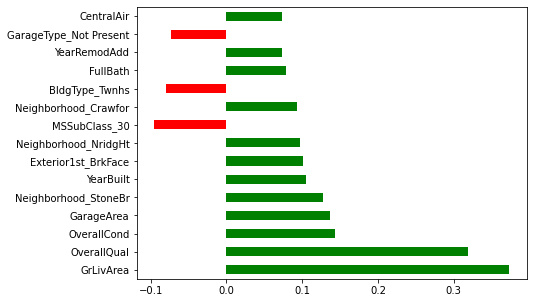

In [322]:
# Ploting top 15 variables influences the Price of house
plt.figure(figsize= (7, 5))
top15_features_lasso.plot.barh(color= (top15_features_lasso > 0).map({True: 'g', False: 'r'}))
plt.show()

#### As per final Model, the top 10 predictor variables that influences the Price of house are:

- ('GrLivArea','OverallQual','OverallCond','GarageArea','Neighborhood_StoneBr','YearBuilt','Exterior1st_BrkFace',
    'Neighborhood_NridgHt','Neighborhood_Crawfor','FullBath')

#### Assignment 2 - Double the value of alpha in Ridge and Lasso

In [323]:
# Double the value of optimal alpha in Ridge
ridge2= Ridge(alpha= 16, random_state= 42)
ridge2.fit(X_train, y_train)

Ridge(alpha=16, random_state=42)

In [324]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef2= pd.Series(ridge2.coef_, index= X_train.columns)
top10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge2

OverallQual             0.205808
GrLivArea               0.145821
OverallCond             0.111776
GarageArea              0.106464
1stFlrSF                0.103543
2ndFlrSF                0.102571
FullBath                0.091342
Neighborhood_StoneBr    0.087768
MSSubClass_30          -0.083300
Exterior1st_BrkFace     0.078694
dtype: float64

In [325]:
# Double the value of optimal alpha in Lasso
lasso2= Lasso(alpha= .0014, random_state=42)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0014, random_state=42)

In [326]:
# Top 10 features with double the value of optimal alpha in Lasso
lasso_coef2= pd.Series(lasso2.coef_, index= X_train.columns)
top10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top10_lasso2

OverallQual             0.377499
GrLivArea               0.372707
GarageArea              0.154041
OverallCond             0.123692
YearRemodAdd            0.078064
CentralAir              0.077008
Neighborhood_NridgHt    0.074724
Exterior1st_BrkFace     0.073594
MSSubClass_30          -0.072364
Neighborhood_StoneBr    0.067855
dtype: float64

#### Five Most important Predictor variable in the Lasso Model

In [331]:
# Checking top 5 features in the lasso model
top15_features_lasso.nlargest()

GrLivArea               0.373734
OverallQual             0.319486
OverallCond             0.142915
GarageArea              0.137348
Neighborhood_StoneBr    0.127501
dtype: float64

In [334]:
# As Neighborhood_StoneBr is a dummy variable, we'll drop entire Neighborhood feature.
# Checking all Neighborhood dummy variables
cols_drop= X_train.columns[X_train.columns.str.startswith('Neighborhood')].tolist()
cols_drop

['Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker']

In [335]:
cols_drop.extend(['GrLivArea','OverallQual','OverallCond','GarageArea'])
cols_drop

['Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageArea']

In [336]:
# Droping above features from X_train and X_test
X_train= X_train.drop(cols_drop, axis= 1)
X_test= X_test.drop(cols_drop, axis= 1)
X_train.shape, X_test.shape

((1021, 192), (439, 192))

In [337]:
# Building Lasso model with above features
lasso3= Lasso(alpha= .0007, random_state= 42)
lasso3.fit(X_train, y_train)

Lasso(alpha=0.0007, random_state=42)

In [341]:
# Top 5 features after droping top 5 features of Previous Lasso model
lasso_coef3= pd.Series(lasso3.coef_, index= X_train.columns)
top5_lasso3=  lasso_coef3[abs(lasso_coef3[lasso_coef3 != 0]).nlargest(5).index]
top5_lasso3

1stFlrSF               0.406328
2ndFlrSF               0.359682
KitchenQual_TA        -0.128247
YearRemodAdd           0.126438
Exterior1st_BrkFace    0.125430
dtype: float64